### tensorflow 안깔려 있으면 anconda promt에 conda install tensorflow를 입력해 설치해준다. 

# import modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data preparation and visualization

Y=ax+b 에서 Y와 X는 주어진 데이터값 a와b를 찾는 거임.
데이터 값에 x가 2개라면? - Y = a1x1 + a2x2 + b (b는 정해진 값) 찾는 값은 3개
입력(x)3개 출력(y)2개라면? - y1=a1x1 + a2x2 + a3x3 + b / y2 = a4x1 + a5x2 + a6x3 + b2
찾는 값은 총 8개 

Y=ax+b 이런 형태를 모델이라 부르자.

In [4]:
pd.read_csv('regression.csv')

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


### regression.csv 값을 가져 온후 data로 설정해준다. X= data['x']를 해줌으로써 x값만 표시해줄 수 있다. plt.plot(X,Y,'.') 값들의 패턴을 그래프로 표현해준다. ' ' 이 사이에 넣는 기호로 표현된다.
plt.plot(X,Y)이렇게만 돼 있으면 선으로 표현돼서 들쭉날쭉하게 나온다. 이게 디폴트값임
x값이 여러개라면  X= data['X1'] 이런식으로 번호 설정해주면 됨

x가 하나 y가 하나라 plotable 했던 것이다. 차원이 높아지면 표현이 쉽게 안됨. 
입력2개 출력 1개 (y= a1x1+a2x2+b) 정도는 생각이 가능 4차원 부터는 생각 자체가 안됨.


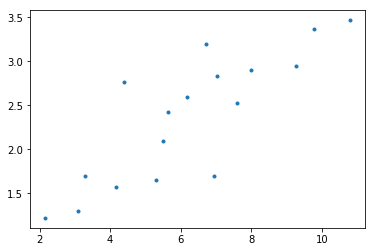

In [6]:
data=pd.read_csv('regression.csv')
X= data['X']
Y= data['Y']
plt.plot(X,Y,'.')

# create model

시퀀스로 모델의 모양을 정해준다. 여기선
optimizer:출력 값과 실제 정답 간의 차이를 조정 해주는데 (어떻게 그 차이를 활용할지) 다양한 방법이 있는데 여기선sgd (일종의 미분 알고리즘)이 쓰였다. 
loss는 출력된 값과 실제 정답부의 차이를 정의하는 함수
데이터 값이 없어서 이것만으론 안된다.

model.add(Dense(1, input_shape=[1])) - [1]:입력이 한개 1: 출력이 한개
ex) model.add(Dense(2, input_shape=[3])) [3]:입력이 3개 2: 출력이 2개

dense- fully connected (오밀조밀하게 서로서로 다 연결 돼있는것)


In [11]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(optimizer='sgd',loss='mse')

# train model

model.fit() - 만든 모델을 트레이닝하는 것
17/17 데이터들이 다 쓰인 걸 알 수 있다.
epochs - 데이터를 몇번 돌릴지 설정하는 것 - 돌리는 횟수가 많을 수록 loss가 줄어드는 걸 볼 수 있다. 끝에는 유효값이 나옴(ex:loss: 1.2552e-04)
fit(x,y)로 써야함  fit([x,y])하면 프리딕션이 잘 안됨.

In [24]:
model.fit(X,Y,epochs = 100)

Epoch 1/100
17/17 [==============================] - 0s 17ms/sample - loss: 2.3659
Epoch 2/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1795
Epoch 3/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1590
Epoch 4/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1588
Epoch 5/100
17/17 [==============================] - 0s 919us/sample - loss: 0.1587
Epoch 6/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1587
Epoch 7/100
17/17 [==============================] - 0s 919us/sample - loss: 0.1587
Epoch 8/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1587
Epoch 9/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1586
Epoch 10/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1586
Epoch 11/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1586
Epoch 12/100
17/17 [==============================] - 0s 0s/sample - loss: 0.1586
Epoch 13/100
17/1

# model prediction

model.predict
x값은 내가 임의로 설정, 실제 모델이 2부터 10이니 그와 유사하게 하는게 좋을 것.
만들어낸 모델값이 실제로 잘 작동하는지 확인하는 과정
파란색은 원래 data , rx(redx)값은 새롭게 넣어준 값
예측값은 일직선에 가깝다. (우리 모데을 y=ax기 때문)
대문자 소문자 xy는 각각 다른 모델임. 소문자는 비교용으로 만든것 대문자는 만든 모델

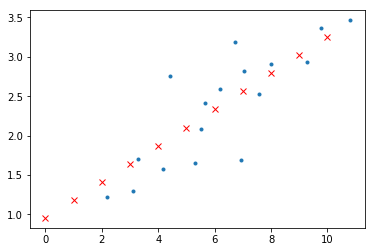

In [25]:
x= [0,1,2,3,4,5,6,7,8,9,10]
y = model.predict(x)
plt.plot(X,Y, '.')
plt.plot(x,y, 'rx')
plt.show()

# what are a and b in y = ax + b?

layer[0]: 첫번쨰 레이어 (우리는 하나만 만들어서..)
a,b값을 찾아내는 과정
첫번째 값이 a 값 - 눈에 보이는데로 1보다 작음
두번째 값은 y절편(b값 - 0에 가까움을 알 수 있다.)

In [28]:
weights=model.layers[0].get_weights()
print(weights)

[array([[0.22947718]], dtype=float32), array([0.9558897], dtype=float32)]
